# Problem Set 8

## Question 1 - Decision trees (5 points).
Joe Biden was the 47th Vice President of the United States. He was the subject of many memes, attracted the attention of Leslie Knope (Parks and Recreation, TV sitcom), and experienced a brief surge in attention due to photos from his youth. The data file biden.csv contains a selection of variables from the 2008 American National Election Studies survey that allow you to test competing factors that may influence attitudes towards Joe Biden. The variables are coded as follows:

-biden: feeling thermometer ranging from 0 to 100. Feeling thermometers are a common metric in survey research used to gauge attitudes or feelings of warmth towards individuals and institutions. They range from 0-100, with 0 indicating extreme coldness and 100 indicating extreme warmth.<br>

-female: =1 if respondent is female, =0 if respondent is male <br>

-age: age of respondent in years, range from 18 to 93 <br>

-dem: =1 if respondent is a Democrat, =0 otherwise<br>

-rep: =1 if respondent is a Republican, =0 otherwise<br>

-educ: number of years of formal education completed by respondent, range from 0 to 17 with 17+ representing the first year of grad school and up.

### a) 
Split the data into a training set (70%) and a test set (30%) using the sklearn.model selection.train test split() function with random state=25. Setting the seed will guarantee you all get the same results. Use recursive
binary splitting to fit a decision tree to the training data, with biden
as the response variable and the other variables as predictors. Set the
max depth=3 and min samples leaf=5 Plot the tree and interpret the re-
sults. What is the test MSE?

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [2]:
biden_data = pd.read_csv('Biden.csv')

In [3]:
biden_data.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [4]:
X= biden_data[['female','age','educ','dem','rep']]
y= biden_data[['biden']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=25)

In [5]:
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

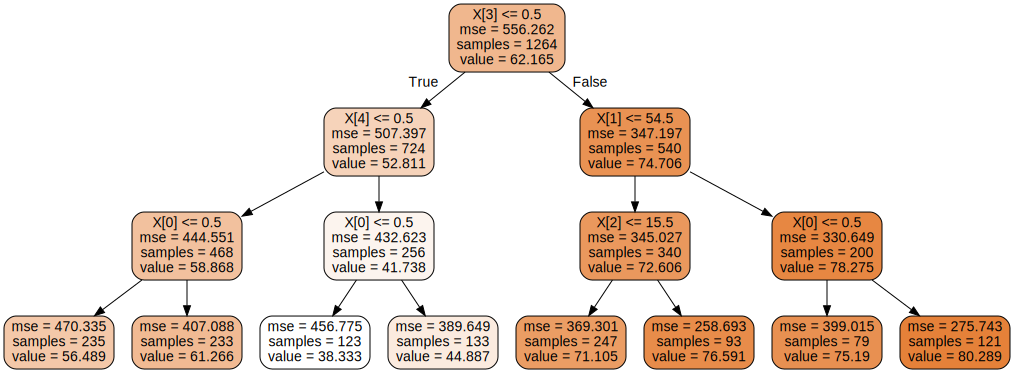

In [6]:
from sklearn.tree import export_graphviz
import graphviz

biden_tree_viz = export_graphviz(
    biden_tree,
    out_file=None,
    # feature_names=iris.feature_names[2:],
    # class_names=iris.target_names,
    rounded=True,
    filled=True,
)

graph = graphviz.Source(biden_tree_viz)
graph.render('biden_tree_viz')
graph

In [7]:
y_pred = biden_tree.predict(X_test)
MSE1 = mean_squared_error(y_test, y_pred)
print('MSE=', MSE1)

MSE= 396.1937146321307


## b) 
Use sklearn.model selection.RandomizedSearchCV to optimally tune
the hyperparameters in the decision tree from part (a). Tune the parameters max depth, min samples split, and min samples leaf. Set
n iter=100, n jobs=-1, cv=5 for k = 5 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. This last option will allow you
to compare the MSE of the optimized tree (it will output the negative MSE) to the MSE calculated in part (a). Set your parameter distributions over which to test random combinations to the following.

Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

In [8]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_dist1 = {'max_depth': [3, 10],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20)}

biden_tree2 = DecisionTreeRegressor()
random_search1 = RandomizedSearchCV(biden_tree2, param_distributions=param_dist1,
                                    n_iter=100, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')

In [9]:
random_search1.fit(X, y)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
RandBestParams1= {'max_depth': 3, 'min_samples_leaf': 17, 'min_samples_split': 14}
RandBestScore1= 401.6903602232667


### c)
Now tune the parameters of a RandomForest regression model on these data sklearn.ensemble.RandomForestRegressor(). Use
sklearn.model selection.RandomizedSearchCV to optimally tune the hyperparameters in the random forest regression model. Tune the parameters n estimators, max depth, min samples split, min samples leaf, and max features. Set n iter=100, n jobs=-1, cv=5 for k = 5 k-fold cross validation, random state=25, and scoring=’neg mean squared error’. Set your Random Forest parameter distributions over which to test random combinations to the following.
Report your optimal tuning parameter values (use the .best params object of your RandomizedSearchCV().fit(X, y)) results). Report the MSE of your optimal results (use the .best score object of your RandomizedSearchCV().fit(X, y)) results.

In [35]:
from sklearn.ensemble import RandomForestRegressor

#Create first Random Forest
biden_rf = RandomForestRegressor(n_estimators=100, max_features=4, bootstrap=True,
                                  n_jobs=-1, oob_score=True, random_state=25)

biden_rf.fit(X,y)

print('OOB score=', biden_rf.score(X, y))
y_pred = biden_rf.oob_prediction_
MSE = mean_squared_error(y, y_pred)
print('MSE=', MSE)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


OOB score= 0.7007385123549247
MSE= 533.5736881299662


In [36]:
#Tune hyperparameters
param_dist_tune = {'n_estimators': sp_randint(1,200),
                   'max_depth': [3, 10],'min_samples_split': sp_randint(2, 20),
                   'min_samples_leaf': sp_randint(2, 20),'max_features':['auto', 'sqrt']}

biden_tune = RandomizedSearchCV(biden_rf, param_distributions=param_dist_rf,
                                    n_iter=100, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=25,
           verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1b996908>, 'max_depth': [3, 10], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1b996be0>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1b5ad2b0>, 'max_features': ['auto', 'sqrt']},
          pre_dispatch='2*n_jobs', random_state=25, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_

In [37]:
#Get best parameters

biden_tune.fit(X,y)
print('TunedBestEstimator1=', biden_rf_tune.best_estimator_)
print('TunedBestParams1=', biden_rf_tune.best_params_)
print('TunedBestScore1=', -biden_rf_tune.best_score_)

TunedBestEstimator1= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=17, n_jobs=-1,
           oob_score=True, random_state=25, verbose=0, warm_start=False)
TunedBestParams1= {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 17}
TunedBestScore1= 397.9260229368583


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [38]:
#Run new Random Forest with optimal parameters

biden_rf_opt = RandomForestRegressor(n_estimators=17, max_depth=3, min_samples_split=2, min_samples_leaf=10,
                                     max_features='sqrt', bootstrap=True,
                                     n_jobs=-1, oob_score=True, random_state=25)

biden_rf_opt.fit(X,y)

print('OOB score=', biden_rf_opt.score(X, y))
y_pred_opt = biden_rf_opt.oob_prediction_
MSE = mean_squared_error(y, y_pred_opt)
print('MSE=', MSE)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score= 0.290351278640653
MSE= 406.0381164784667


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


OOB score= 0.290351278640653
MSE= 406.0381164784667


In [15]:
from sklearn.ensemble import RandomForestRegressor

B4 =100
m4 = 4
biden_tree3 = RandomForestRegressor(n_estimators=B4, max_features=m4, bootstrap=True,
                                  n_jobs=-1, oob_score=True, random_state=25)

biden_tree3.fit(X,y)

print('OOB score=', biden_tree3.score(X, y))
y_pred = biden_tree3.oob_prediction_
MSE = mean_squared_error(y, y_pred)
print('MSE=', MSE)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


OOB score= 0.7007385123549247
MSE= 533.5736881299662


In [11]:
biden_tree33 = RandomForestRegressor(n_estimators=100,max_depth=[3, 10],min_samples_split= sp_randint(2, 20),
                                     min_samples_leaf=sp_randint(2, 20),max_features=sp_randint(1, 5), bootstrap=True,
                                     n_jobs=-1, oob_score=True, random_state=25)

biden_tree33.fit(X,y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


TypeError: '<' not supported between instances of 'float' and 'rv_frozen'

In [81]:
param_dist2 = {'n_estimators': [10, 200],
             'max_depth': [3, 10],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20),
             'max_features': sp_randint(1, 5)}

random_search2 = RandomizedSearchCV(biden_tree3, param_distributions=param_dist2,
                                    n_iter=100, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')

In [83]:
random_search2.fit(X,y)
print('RandBestEstimator1=', random_search2.best_estimator_)
print('RandBestParams1=', random_search2.best_params_)
print('RandBestScore1=', -random_search2.best_score_)

RandBestEstimator1= RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=2, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=13, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=True, random_state=25,
           verbose=0, warm_start=False)
RandBestParams1= {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 17, 'min_samples_split': 13, 'n_estimators': 10}
RandBestScore1= 397.0681090117028


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:732: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [76]:
from sklearn.ensemble import RandomForestRegressor

param_dist2 = {'n_estimators': [10, 200],
             'max_depth': [3, 10],
             'min_samples_split': sp_randint(2, 20),
             'min_samples_leaf': sp_randint(2, 20),
             'max_features': sp_randint(1, 5)}

biden_tree3 = DecisionTreeRegressor()

random_search2 = RandomizedSearchCV(biden_tree3, param_distributions=param_dist2,
                                    n_iter=100, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')
#biden_rf = RandomForestRegressor(n_estimators=200, max_features=m4, bootstrap=True,
                                  #n_jobs=-1, oob_score=True, random_state=25)

In [77]:
random_search2.fit(X, y)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)

ValueError: Invalid parameter n_estimators for estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=3,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=14, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
print('OOB score=', hit_tree4.score(X, y))
y_pred4 = hit_tree4.oob_prediction_
MSE4 = mean_squared_error(y, y_pred4)
print('MSE=', MSE4)